In [ ]:
import warnings
warnings.filterwarnings('ignore')
import glob
from tqdm import tqdm
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K

In [ ]:
from google.colab import drive
drive.mount('/content/drive' , force_remount=True)

Mounted at /content/drive


In [ ]:
num_classes = 82
epoch = 55
batch_size = 32

In [ ]:
! pip install gdown

In [ ]:
! gdown https://drive.google.com/uc?id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo

Downloading...
From: https://drive.google.com/uc?id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo
To: /content/vgg_face_weights.h5
580MB [00:05, 103MB/s]


In [ ]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [ ]:
model.load_weights('vgg_face_weights.h5')

In [ ]:
vgg_face_feature1=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)
vgg_face_feature2=Model(inputs=model.layers[0].input,outputs=model.layers[-5].output)
vgg_face_feature3=Model(inputs=model.layers[0].input,outputs=model.layers[-7].output) 

In [ ]:
vgg_face_feature1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_input (InputL [(None, 224, 224, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0     

In [ ]:
train_dirs = glob.glob("drive/MyDrive/images1/*")
train_dirs.sort()
train_dirs = train_dirs[:num_classes]
print(train_dirs)
data_fc3 =[] 
data_fc2 = []
data_fc1 = []
id_person = []
for train_dir in tqdm(train_dirs):
  imgPaths = glob.glob(train_dir + "/*.JPG")
  imgPaths.sort()
  for imgPath in tqdm(imgPaths):
    image = load_img(imgPath, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image , axis=0)
    image=preprocess_input(image)
    image_encode_fc3=vgg_face_feature1(image)
    image_encode_fc2=vgg_face_feature2(image)
    image_encode_fc1=vgg_face_feature3(image)
    data_fc3.append(np.squeeze(K.eval(image_encode_fc3)).tolist())
    data_fc2.append(np.squeeze(K.eval(image_encode_fc2)).tolist())
    data_fc1.append(np.squeeze(K.eval(image_encode_fc1)).tolist())

    id_label = imgPath.split(os.path.sep)[-2]
    id_label = int(id_label)-1
    id_person.append(id_label) 

print("id:",id_person)

['drive/MyDrive/images1/001', 'drive/MyDrive/images1/002', 'drive/MyDrive/images1/003', 'drive/MyDrive/images1/004', 'drive/MyDrive/images1/005', 'drive/MyDrive/images1/006', 'drive/MyDrive/images1/007', 'drive/MyDrive/images1/008', 'drive/MyDrive/images1/009', 'drive/MyDrive/images1/010', 'drive/MyDrive/images1/011', 'drive/MyDrive/images1/012', 'drive/MyDrive/images1/013', 'drive/MyDrive/images1/014', 'drive/MyDrive/images1/015', 'drive/MyDrive/images1/016', 'drive/MyDrive/images1/017', 'drive/MyDrive/images1/018', 'drive/MyDrive/images1/019', 'drive/MyDrive/images1/020', 'drive/MyDrive/images1/021', 'drive/MyDrive/images1/022', 'drive/MyDrive/images1/023', 'drive/MyDrive/images1/024', 'drive/MyDrive/images1/025', 'drive/MyDrive/images1/026', 'drive/MyDrive/images1/027', 'drive/MyDrive/images1/028', 'drive/MyDrive/images1/029', 'drive/MyDrive/images1/030', 'drive/MyDrive/images1/031', 'drive/MyDrive/images1/032', 'drive/MyDrive/images1/033', 'drive/MyDrive/images1/034', 'drive/MyDriv

100%|██████████| 82/82 [32:06<00:00, 23.50s/it]

id: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 

In [ ]:
print(len(data_fc1),len(data_fc2),len(data_fc3),len(id_person))
data_fc1 = np.array(data_fc1)
data_fc2 = np.array(data_fc2)
data_fc3 = np.array(data_fc3)
id_person = np.array(id_person)
print(data_fc1[0].shape," ",data_fc2[0].shape," ", data_fc3[0].shape)
print(data_fc1.shape," ",data_fc2.shape," ", data_fc3.shape)

920 920 920 920
(4096,)   (4096,)   (2622,)
(920, 4096)   (920, 4096)   (920, 2622)


In [ ]:
feature_list = list()
data_comb_fc1_fc2 = np.hstack((data_fc1 , data_fc2))
data_comb_fc1_fc3 = np.hstack((data_fc1 , data_fc3))
data_comb_fc2_fc3 = np.hstack((data_fc2 , data_fc3))
data_comb_fc1_fc2_fc3 = np.hstack((data_fc1 , data_fc2 , data_fc3))
feature_list.append(data_fc1)
feature_list.append(data_fc2)
feature_list.append(data_fc3)
feature_list.append(data_comb_fc1_fc2)
feature_list.append(data_comb_fc1_fc3)
feature_list.append(data_comb_fc2_fc3)
feature_list.append(data_comb_fc1_fc2_fc3)
for data in feature_list:
  print("shape of each feature :",data.shape)

shape of each feature : (920, 4096)
shape of each feature : (920, 4096)
shape of each feature : (920, 2622)
shape of each feature : (920, 8192)
shape of each feature : (920, 6718)
shape of each feature : (920, 6718)
shape of each feature : (920, 10814)


In [ ]:
def build_model():
  classifier_model=Sequential()	
  classifier_model.add(Dense(units=256,input_dim=train_input.shape[1],kernel_initializer='glorot_uniform'))		
  classifier_model.add(BatchNormalization())		
  classifier_model.add(Activation('relu'))
  classifier_model.add(Dropout(0.5))
  classifier_model.add(Dense(units=128,kernel_initializer='glorot_uniform'))		
  classifier_model.add(BatchNormalization())		
  classifier_model.add(Activation('relu'))
  classifier_model.add(Dropout(0.3))
  classifier_model.add(Dense(units=82,kernel_initializer='glorot_uniform'))
  classifier_model.add(Activation('softmax'))
  return classifier_model

In [ ]:
from matplotlib import pyplot as plt
def plot_model(training_log , fold , feature_idx):
  epoch_np = np.array(epoch)
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(epoch_np), training_log.history["loss"], label="train_loss")
  plt.plot(np.arange(epoch_np), training_log.history["acc"], label="train_acc")
  plt.plot(np.arange(epoch_np), training_log.history["val_loss"], label="val_loss")
  plt.plot(np.arange(epoch_np), training_log.history["val_acc"], label="val_acc")
  plt.xlabel("epoch")
  plt.ylabel("loss/accuracy")
  plt.title("training plot model_"+str(fold) + " feature vector " + str(feature_idx))
  plt.legend(loc="middle right")
  plt.savefig("training_plot"+ str(fold)+"_feature _vector" + str(feature_idx)+"png")

In [ ]:
for idx , data in enumerate(feature_list):
  print("data shape:",data.shape ," idx :" , idx )

data shape: (920, 4096)  idx : 0
data shape: (920, 4096)  idx : 1
data shape: (920, 2622)  idx : 2
data shape: (920, 8192)  idx : 3
data shape: (920, 6718)  idx : 4
data shape: (920, 6718)  idx : 5
data shape: (920, 10814)  idx : 6


Streaming output truncated to the last 5000 lines.

Epoch 00034: val_acc improved from 0.92935 to 0.93478, saving model to /content/drive/MyDrive/saved_models_kfold/model_3_feature_list2.h5
Epoch 35/55
23/23 [==============================] - 0s 13ms/step - loss: 0.1649 - acc: 0.9769 - val_loss: 0.3690 - val_acc: 0.9293

Epoch 00035: val_acc did not improve from 0.93478
Epoch 36/55
23/23 [==============================] - 0s 13ms/step - loss: 0.1473 - acc: 0.9837 - val_loss: 0.4145 - val_acc: 0.9185

Epoch 00036: val_acc did not improve from 0.93478
Epoch 37/55
23/23 [==============================] - 0s 13ms/step - loss: 0.1676 - acc: 0.9728 - val_loss: 0.3983 - val_acc: 0.9022

Epoch 00037: val_acc did not improve from 0.93478
Epoch 38/55
23/23 [==============================] - 0s 14ms/step - loss: 0.1725 - acc: 0.9755 - val_loss: 0.4053 - val_acc: 0.9130

Epoch 00038: val_acc did not improve from 0.93478
Epoch 39/55
23/23 [==============================] - 0s 14ms/step - loss: 0.15

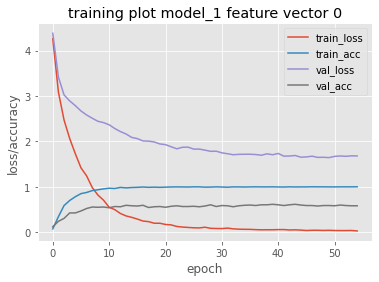

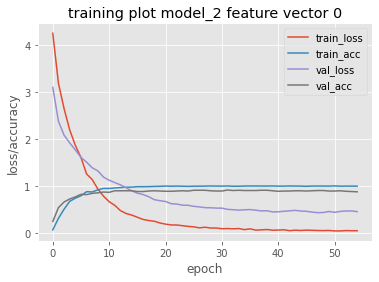

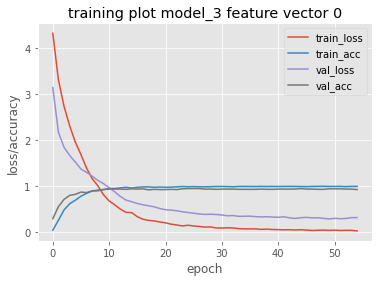

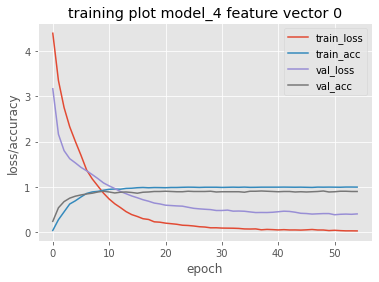

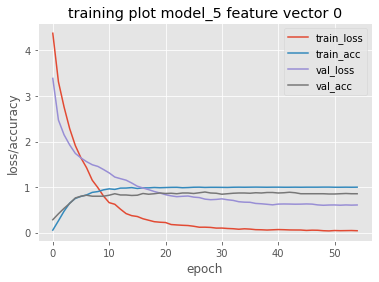

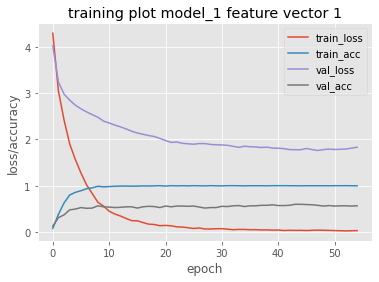

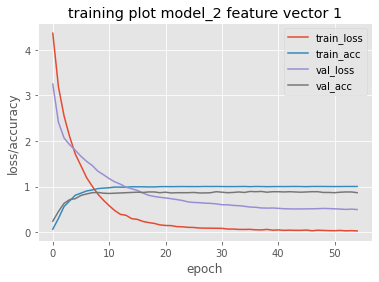

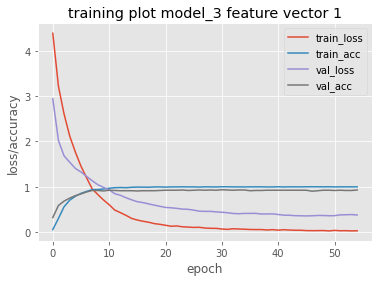

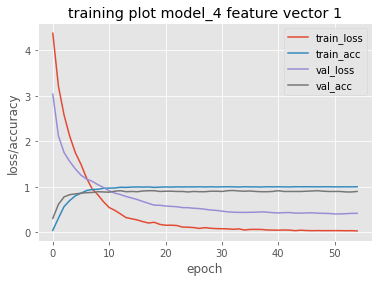

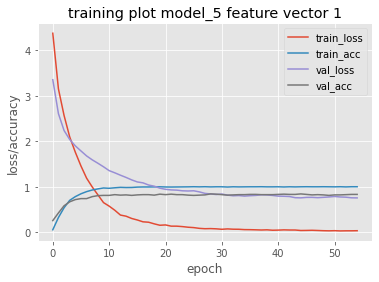

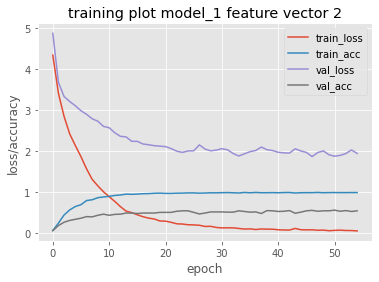

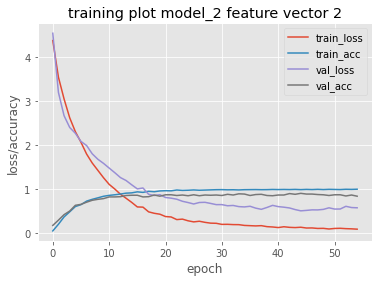

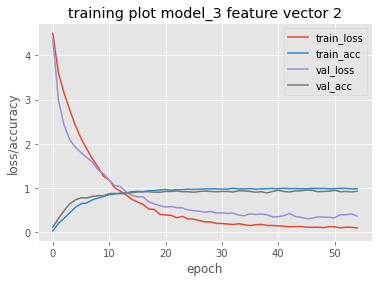

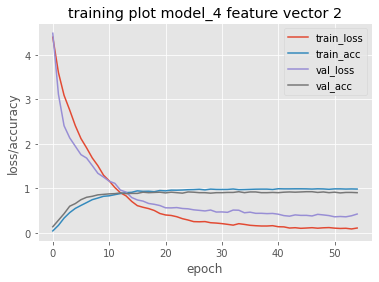

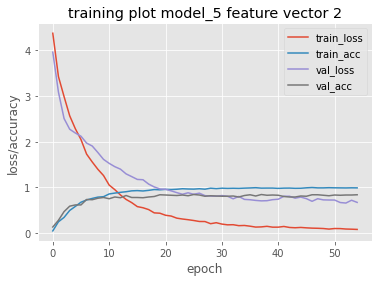

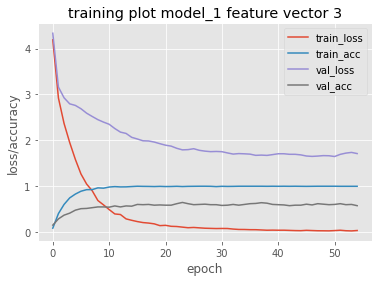

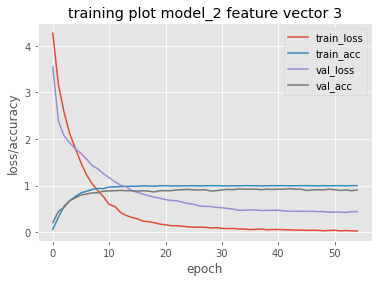

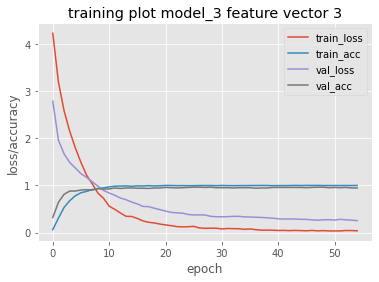

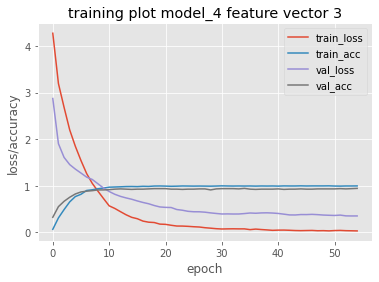

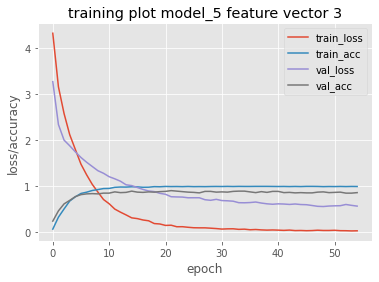

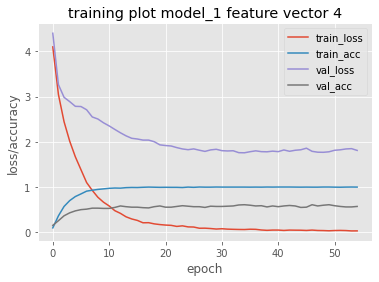

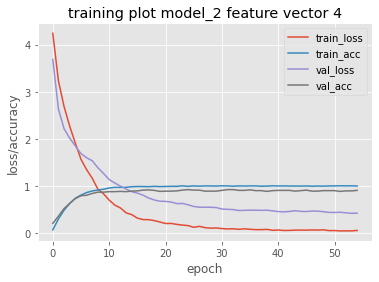

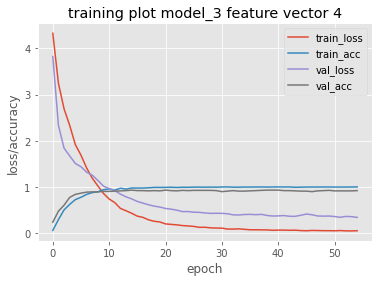

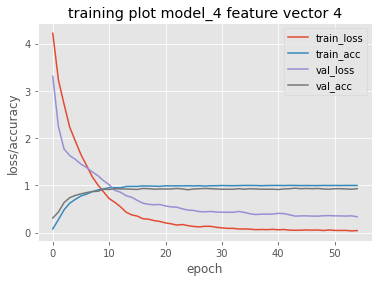

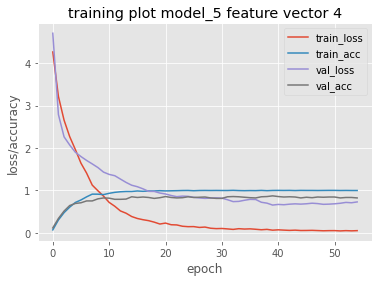

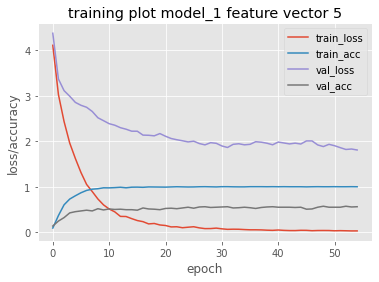

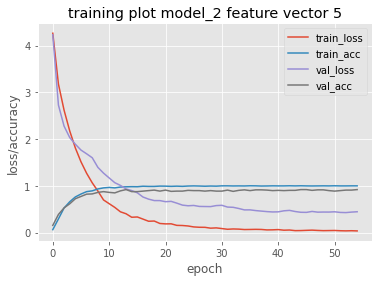

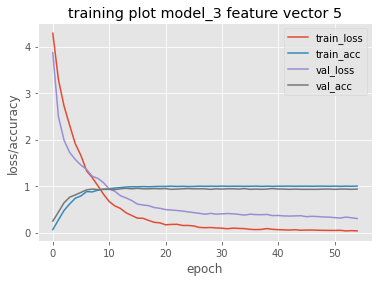

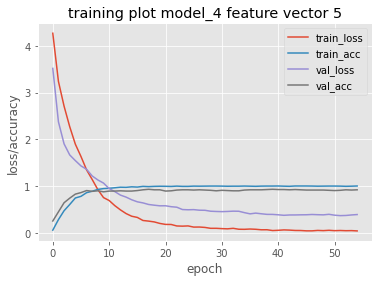

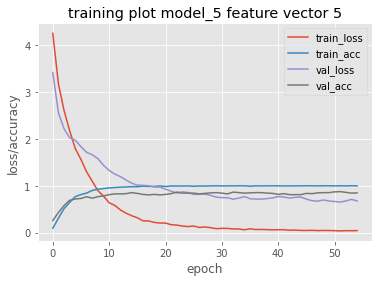

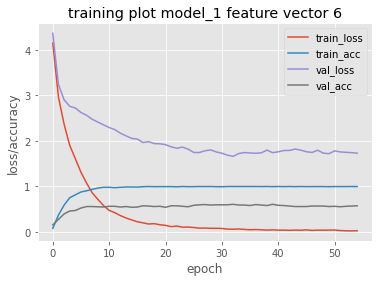

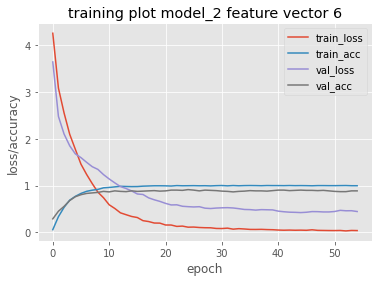

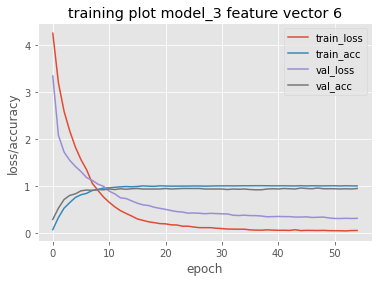

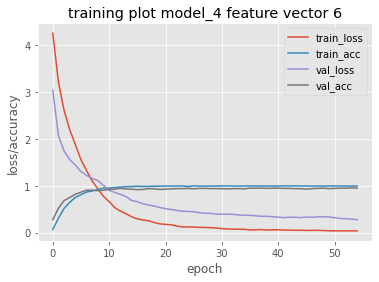

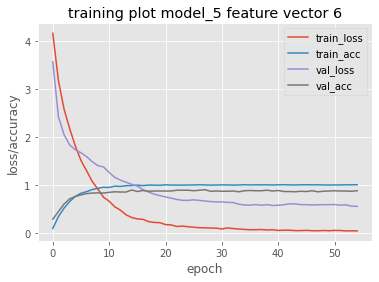

In [ ]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
kf = StratifiedKFold(n_splits=5)
save_dir = '/content/drive/MyDrive/saved_models_kfold/'
validation_loss = []
validation_accuracy = []
for idx , data in enumerate(feature_list):
  cnt = 1
  loss_list = list()
  ack_list = list()
  for train , test in kf.split(data , id_person):
    train_input , train_target = data[train] , id_person[train]
    valid_input , valid_target = data[test] , id_person[test]
    train_target = to_categorical(train_target, num_classes=num_classes)
    valid_target = to_categorical(valid_target, num_classes=num_classes)
    model = build_model()
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["acc"])
    checkpoint = ModelCheckpoint(filepath=save_dir+"model_"+str(cnt)+"_feature_list"+str(idx)+".h5",
                              monitor="val_acc",
                              verbose=1,
                              save_best_only=True)
    training_log = model.fit(train_input,train_target,epochs=epoch,validation_data=(valid_input,valid_target),callbacks=[checkpoint])
    plot_model(training_log , cnt , idx)
    model.load_weights(save_dir+"model_"+str(cnt)+"_feature_list"+str(idx)+".h5")
    results = model.evaluate(valid_input,valid_target)
    results = dict(zip(model.metrics_names , results))
    ack_list.append(results['acc'])
    loss_list.append(results['loss'])
    K.clear_session()
    print("cnt :", cnt)
    print("="*100)
    cnt = cnt + 1
  validation_accuracy.append(ack_list)
  validation_loss.append(loss_list)
  print("===========================finish============================")

In [ ]:
validation_loss = np.array(validation_loss)
validation_accuracy = np.array(validation_accuracy)
for i in range(7):
  print("information about feature"+str(i))
  print("mean_validation_acc:",validation_accuracy[i].mean()," mean_validation_loss:",validation_loss[i].mean())
  print("="*40)

information about feature0
mean_validation_acc: 0.85652174949646  mean_validation_loss: 0.7629081010818481
information about feature1
mean_validation_acc: 0.836956524848938  mean_validation_loss: 0.8091685533523559
information about feature2
mean_validation_acc: 0.835869562625885  mean_validation_loss: 0.8072845995426178
information about feature3
mean_validation_acc: 0.879347825050354  mean_validation_loss: 0.759655374288559
information about feature4
mean_validation_acc: 0.853260850906372  mean_validation_loss: 0.8188636720180511
information about feature5
mean_validation_acc: 0.848913037776947  mean_validation_loss: 0.9626973748207093
information about feature6
mean_validation_acc: 0.865217387676239  mean_validation_loss: 0.6982445180416107


In [ ]:
print("val_ack:",validation_accuracy)
print("val_loss:",validation_loss)

val_ack: [[0.61413044 0.9130435  0.95108694 0.9130435  0.89130437]
 [0.59782606 0.89130437 0.93478262 0.91847825 0.84239131]
 [0.56521738 0.89673913 0.95108694 0.92391306 0.84239131]
 [0.64673913 0.93478262 0.9619565  0.94565219 0.90760869]
 [0.60869563 0.91847825 0.92934781 0.94021738 0.86956519]
 [0.57065219 0.91847825 0.95108694 0.92934781 0.875     ]
 [0.60869563 0.9130435  0.95108694 0.95652175 0.89673913]]
val_loss: [[1.70592368 0.50202811 0.43141279 0.44032714 0.7348488 ]
 [1.77719331 0.54914743 0.43791345 0.43989322 0.84169537]
 [1.87727821 0.49942568 0.30450749 0.50743204 0.84777957]
 [1.79289472 0.44928393 0.37522149 0.40592164 0.77495509]
 [1.75737    0.59586966 0.73900855 0.34979782 0.65227234]
 [1.88178897 0.93223357 0.74373549 0.60419595 0.65153289]
 [1.66082942 0.54857159 0.33236265 0.28979048 0.65966845]]
